## Radial Basis Functions

### Use of gamma paramater for interpolation

RBF Regression (one weight per data point)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def matrix_of_equations(X, gamma):
    '''
    Φ matrix used for computing weights vector.
       
    Input: 
    X is a matrix consisting of N training vectors.
    e.g.,  X = [[0,1]
                [2,3]
                [5,4]]   (N=3, d=2) 
                
    Output: 
    N*N matrix of equations  
    [ exp(−γ ‖[0,1]-[0,1]‖^2),     ...[0,1]-[2,3]...,     ...[0,1]-[5,4]..., 
      ........[2,3]-[0,1]....,     ...[2,3]-[2,3]...,     ...[2,3]-[5,4]...,
      ........[5,4]-[0,1]...,,     ...[5,4]-[2,3]...,     ...[5,4]-[5,4]... ]
    '''
    return np.exp(- gamma * (np.linalg.norm(X[:, np.newaxis] - X[np.newaxis, :],
                                            axis=2) ** 2) )

def weights(X, y, gamma):
    '''
    Returns a weights vector where number of w's equal number of data inputs.
    w = inverse(Φ) ⋅ y
    '''
    phi = matrix_of_equations(X, gamma)
    return np.dot(np.linalg.inv(phi), y)

#training X points
X = np.array( [ [1,1], [3,3], [5,5] ] )
y = np.array( [     1,     3,     5 ] ) 

print 'matrix of equations, Φ:'
gamma = np.ones(len(X))
for row in matrix_of_equations(X, gamma):
    for equation in row:
        print '{:>7}'.format(round(equation, 4)),
    print
w = weights(X, y, gamma)
print '\ndot(Φ, w):  ', np.dot(matrix_of_equations(X, gamma), w)

matrix of equations, Φ:
    1.0  0.0003     0.0
 0.0003     1.0  0.0003
    0.0  0.0003     1.0

dot(Φ, w):   [ 1.  3.  5.]


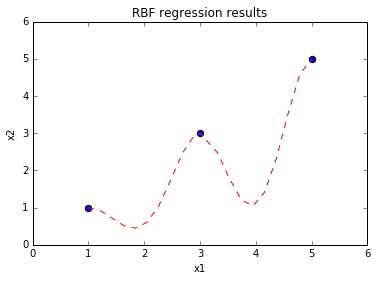

In [2]:
def predict(x, X, w, gamma):
    '''
    Produces zero in-sample error (exact interpolation.)  Out-of-sample error 
    would be based on test point's distance from its nearest training points, as 
    well as the setting of gamma (which must match setting used in Φ.)

            N
    h(x) =  ∑  wn ⋅ exp(−γ ‖x−xn‖^2))
           n=1 
    '''
    return sum(w * np.exp(- gamma * (np.linalg.norm(x - X, axis=1)**2)))

linsp = np.linspace(1, 5, 20)
linsp[10] = 3.0  # include all targets in linsp
axes = plt.gca()
axes.set_xlim([0, 6]) 
axes.set_ylim([0, 6]) 
plt.scatter([[i][0][0] for i in X], [[i][0][1] for i in X], c='b', marker='o', s=40)
plt.plot(linsp, [predict([pt, pt], X, w, gamma) for pt in linsp], 'r--')
plt.title('RBF regression results')
plt.xlabel('x1')
plt.ylabel('x2')

interpolation improves with a small gamma

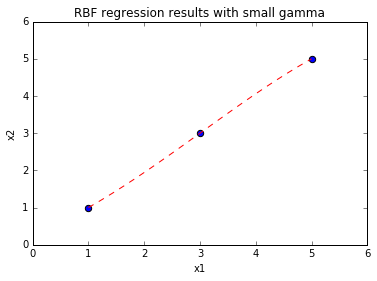

In [3]:
gamma = np.array([0.01, 0.01, 0.01])
w = weights(X, y, gamma)
plt.scatter([[i][0][0] for i in X], [[i][0][1] for i in X], c='b', marker='o', s=40)
plt.plot(linsp, [predict([pt, pt], X, w, gamma) for pt in linsp], 'r--')
plt.title('RBF regression results with small gamma')
plt.xlabel('x1')
plt.ylabel('x2')

gammas may vary between points (length of gamma vector must be N, but only N-1 gammas are utlilized)

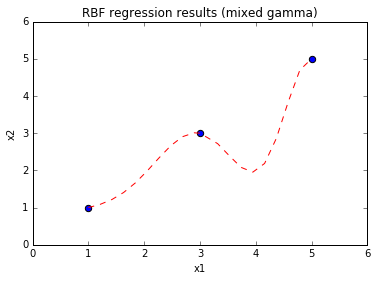

In [4]:
gamma = np.array([0.10, 0.40, 1.0])
w = weights(X, y, gamma)
plt.scatter([[i][0][0] for i in X], [[i][0][1] for i in X], c='b', marker='o', s=40)
plt.plot(linsp, [predict([pt, pt], X, w, gamma) for pt in linsp], 'r--')
plt.title('RBF regression results (mixed gamma)')
plt.xlabel('x1')
plt.ylabel('x2')

### RBF Classifier

K-means clustering

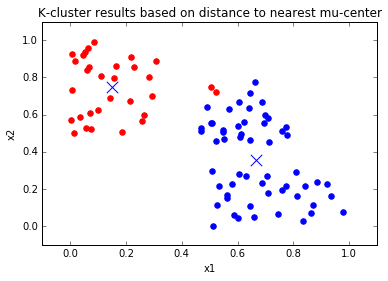

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def k_means_clstr(X, K, tolerance=0.0001, max_iterations=100):
    
    #initialize mu_centers 
    mu_centers = {}
    for k in range(K):
        mu_centers[k] = X[k]

    #run main loop until mu center stop shifting
    for iter_ in range(max_iterations):
        
        # initialize S_k clusters
        S = {}
        for k in range(K):
            S[k] = []
            
        # build clusters based on distance between point and nearest mu_center
        for point in X:
            distances = [np.linalg.norm(point - mu_centers[mu_center]) 
                         for mu_center in mu_centers]
            k = distances.index(min(distances))
            S[k].append(point)
            
        # maintain a record of mu-centers prior to computing mean
        previous = dict(mu_centers)

        # compute mean of each cluster
        for k in S:
            mu_centers[k] = np.average(S[k], axis = 0)
            
        # initialize boolean as True
        optimal = True
        
        # check if there was a shift in mu_centers
        for k in range(K):
            shift = np.linalg.norm(mu_centers[k] - previous[k])
            if shift > tolerance:
                optimal = False

        # break when mu_centers stop shifting
        if optimal:
            return S, mu_centers
        
    print 'maximum number of iterations:', iter_

#load input and plot cluster points
df = pd.read_csv('ipl.csv')
X = df.values
K = 2
S, mu_centers = k_means_clstr(X, K)
colors = ['r', 'b', 'k']
for mu_center in mu_centers:
    plt.scatter(mu_centers[mu_center][0], mu_centers[mu_center][1], s = 130, marker = "x")
for k in S:
    color = colors[k]
    for points in S[k]:
        plt.scatter(points[0], points[1], color = color, s = 30)
axes = plt.gca()
axes.set_xlim([-0.1, 1.1]) 
axes.set_ylim([-0.1, 1.1]) 
plt.title('K-cluster results based on distance to nearest mu-center')
plt.xlabel('x1')
plt.ylabel('x2')

RBF (K-centers) Classifier<br>(results: some +1 class points get clustered with the -1 class) 

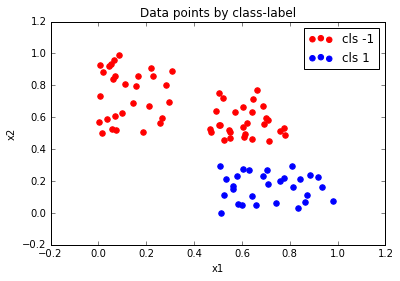

A few points in -1 class happened to be clustered within the other mu-center.
Attempt to learn a value for gamma, that can scoop up some of those points.


In [6]:
# continue above example by assigning labels to points
y = []
for point in X:
    if point[1] > 0.3:  
        y.append(-1)
    else:
        y.append(1)
y = np.array(y)

# plot by classes
r = len(X)
plt.scatter([X[i][0] for i in range(r) if y[i]==-1], 
            [X[i][1] for i in range(r) if y[i]==-1], color='r', s=30, label='cls -1')
plt.scatter([X[i][0] for i in range(r) if y[i]== 1], 
            [X[i][1] for i in range(r) if y[i]== 1], color='b', s=30, label='cls 1')
plt.title('Data points by class-label')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()
print 'A few points in -1 class happened to be clustered within the other mu-center.'
print 'Attempt to learn a value for gamma, that can scoop up some of those points.'

accuracy improves with selection of a value for gamma

In [7]:
# revise Φ to specify mu_centers 
def matrix_of_equations(X, mu_matrx, gamma):
    '''
    Φ-matrix for computing weights vector.
       
    Parameters 
      X is a matrix consisting of N training vectors
      e.g.,  X = [[0,1]
                  [2,3]
                  [5,4]
                  [6,5]]   (N=4, d=2); 
                
      mu_matrx consists of K μ-vectors             
                
    Returns 
      N*k matrix of equations  
      [ exp(−γ ‖[0,1] - μ_1‖^2),     ....[0,1] - μ_2.... 
        ........[2,3] - μ_1....,     ....[2,3] - μ_2....
        ........[5,4] - μ_1....,     ....[5,4] - μ_2....
        ........[6,5] - μ_1...,,     ....[6,5] - μ_2.... ]
    '''
    return np.exp(- gamma * (np.linalg.norm(X[:, np.newaxis] - mu_matrx[np.newaxis, :], 
                                            axis=2) ** 2) )

def weights(X, y, mu_matrx, gamma):
    '''
    weights: (ΦTΦ)-1 ⋅ (ΦT⋅y)    |   pseudo-inverse: (ΦTΦ)−1 ⋅ ΦT
    '''
    phi = matrix_of_equations(X, mu_matrx, gamma)
    return np.dot(np.linalg.pinv(phi), y)

def predict(point, mu_matrx, w, gamma):
    '''
    Prediction based on test point's distance from nearest μ-center, as
    well as the setting of γ (which must match setting used in Φ.)

            K
    h(x) =  ∑  w_k ⋅ exp(−γ ⋅ ‖x − μ_k‖^2) 
           k=1 
    '''
    return sum(w * np.exp(- gamma * (np.linalg.norm(point - mu_matrx, axis=1)**2)))

def accuracy(actual, predicted):
    '''
    Returns accuracy score with respect to given observed and predicted values.
    '''
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.

def compute_score(X, y, mu_matrx, w, gamma):
    '''
    Helper function that calls predict and accuracy functions.
    '''
    predictions = []
    for point in X:
        predictions.append(np.sign(predict(point, mu_matrx, w, gamma)))
    score = accuracy(y, predictions) 
    return score

def survey_gammas(X, y, mu_matrx, increment, limit, maxresults):
    '''
    A simplified approach for maximizing the gamma parameter setting by 
    utilizing a pocket approach, made up of repeated changes to gamma 
    followed by computing model accuracy.
    
    Input:
       X, y, mu_matrx: Input, labels, μ-centers from k-means clustering
       increment: select increment with respect to surveying various settings
       limit: set limit for individual gammas (applies to both abs/neg limits)
       maxresults: if set to True, only maximum results are presented
       
    Function does not return a value.  If maxresults is set to False, accuracy 
    scores are presented with respect to range of gamma settings.  An optimal 
    setting for an individual gamma setting can be explored, e.g., either 
    maintain at minimum setting, or select a higher setting per accuracy score. 
    '''
    # initialize lists for storing gamma settings, and scores
    gammas, scores = [], []

    # loop through gamma indices
    for i in range(K):
    
        # initialize gamma vector (smaller gamma → higher interpolation)
        gamma = np.array( [0.01] * K )
    
        # try out increments
        while gamma[i] < limit:
        
            # train model, compute/store result, then update gamma
            w = weights(X, y, mu_matrx, gamma) # length corresponds to x
            scores.append( compute_score(X, y, mu_matrx, w, gamma) )
            gammas.append( [gamma[0],gamma[1]] ) # length should correspond to K
            gamma[i] = gamma[i] + increment  
        
        # try out decrements
        gamma = np.array( [0.01] * K )  #initialize
        while gamma[i] > (- limit):
        
            # update gamma, train model, compute/store result
            gamma[i] = gamma[i] - increment
            w = weights(X, y, mu_matrx, gamma) # length corresponds to x
            scores.append( compute_score(X, y, mu_matrx, w, gamma) )
            gammas.append( [gamma[0],gamma[1]] ) # length should correspond to K
    
    # headings
    print '{:^30}'.format('gamma setting'),
    print '{:^10}'.format('model accuracy')
    
    # present result associated with highest model score
    if maxresults: 
        ix = scores.index(max(scores))
        print '{:^30}'.format(gammas[ix]),
        print '{:>10}'.format(round(scores[ix], 3))  
        
    # present all results    
    else: 
        for i in range(len(scores)):
            print '{:^30}'.format(gammas[i]),
            print '{:>10}'.format(round(scores[i], 3))
    
# format μ-centers into N|d matrix (N corresponds to K;  d corresponds to x)
mu_matrx = np.array([mu_centers[i] for i in mu_centers]) 

# survey various gamma settings
survey_gammas(X, y, mu_matrx, increment=0.2, limit=3.2, maxresults=True)

        gamma setting          model accuracy
 [0.41000000000000003, 0.01]       95.402


### RBF Networks
Phi-activated hidden layer neurons<br>results compared with least squares regression (closed form solution)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def kMeans(X, K, c, tolerance=0.00001, max_t=20, verbose=True):
    '''
    Parameters
      X          - training set inputs
      K          - number of clusters selected by user
      c          - category, or output-class, number (for messaging purposes only)
      tolerance  - threshold with respect to determination of a shift in μ-centers
      max_t      - maximum number of iterations, typically the function breaks well
                   before this limit is attained
      verbose    - if set to True, the # of iterations completed will be displayed
                   each time function is called by train function
      
    Returns 
      mu_centers - dict key is cluster #, value is μ-vector 
      S          - dict key is cluster #, value is matrix of member points
    '''
    #initialize mu_centers dictionary 
    mu_centers = {}
    for k in range(K):
        mu_centers[k] = X[k]

    #run main loop until mu center stops shifting
    for t in range(max_t):
        
        # copy value of mu_centers dictionary
        previous = dict(mu_centers)

        # initialize S_k clusters
        S = {}
        for k in range(K):
            S[k] = []
            
        # build clusters based on distance between point and nearest mu_center
        for point in X:
            distances = [np.linalg.norm(point - mu_centers[mu_center]) 
                         for mu_center in mu_centers]
            k = distances.index(min(distances))
            S[k].append(point)

        # compute mean of each cluster
        for k in S:
            mu_centers[k] = np.average(S[k], axis = 0)
            
        # initialize boolean as True
        optimal = True
        
        # check if there was a shift in mu_centers
        for k in range(K):
            shift = np.linalg.norm(mu_centers[k] - previous[k])
            if shift > tolerance:
                optimal = False

        # break when mu_centers stop shifting
        if optimal:
            for k in range(K):
                if len(S[k]) < 2:
                    print 'Note: cluster', k, 'has fewer than 2 members'
            if verbose:
                print '\noutput-class:', c, '\n# of iterations in kMeans:', t
            return mu_centers, S
        
    print '\nno convergence after', t, 'iterations'
    
def predict(p, betas, centers, weights):
    '''
    Propogates through an RBF network (as defined by betas and centers) 
    on point p, and weights passed in from an iteration within gradient 
    descent training, or in connection with predict/testing.  Activates a 
    Φ-vector, and computes output.  
    
    Parameters
      p               -  point on which prediction is to be made
      betas, centers  -  vector of betas, matrix of mu-centers (model data)
      weights         -  weights in connection with predict/testing, or w(t) 
                         from gradient descent iterations
    
    Returns
      prediction      -  real-valued output based on Φ-vector dotted with w(t)
    '''
    # Φ-activation on point p
    distances = np.linalg.norm(p - centers, axis=1)
    phi_actv = np.exp(- betas * distances ** 2) 
    phi_actv = np.insert(phi_actv, 0, 1.0) # add threshold to Φ-vector

    # output based on Φ-activation and w(t)
    pred = np.dot(phi_actv, weights)
    return pred

def SGD(X, y, phi, betas, centers, eta=0.01, numEpochs=200, lmbda=0.001):
    '''
    Parameters
      X, y                 - training set inputs and labels
      phi                  - matrix of Φ-activations 
                               axis-0 aligns with network hidden layer 
                               axis-1 aligns with points in training set
      betas, centers       - model data passed along to prediction function
      eta                  - η, learning rate
      numEpochs            - maximum number of training cycle iterations
      lmbda                - regularization parameter
                               
    Returns
      epochs-weights       - weights vector results, one per training cycle
     '''
    # initialize list for storing weights upon each epoch
    w_epchs = []
    
    #initialize a weights vector (size to match number of Φ-matrix columns)
    d = len(phi[0])   
    w = np.array([ np.random.random() for i in range(d) ])
 
    #create a row index for data points in training set
    idx = list(range(len(X)))
    
    #training cycle loop
    for t in range(numEpochs):
        
        #loop over training points in random order
        np.random.shuffle(idx)
        for p in idx:
            
            #propogate network on new point p and new w, compute error
            pred = predict(np.array(X[p]), betas, centers, w)
            error = y[p] - pred
            
            #if error on single point is positive, all w's increase,
            #if error on single point is negative, all w's decrease,
            # ... in relation to Φ_i
            w[0] = w[0] + eta * error  # update threshold
            for i in range(1, d): 
                # w_i(t+1) = w_i(t) + η ⋅ (y_p − y_pred) ⋅ Φ_i
                w[i] = w[i] + eta * error * phi[p][i] 
        
        #store current weights using list comprehension
        w_epchs.append( [ wi for wi in w ] ) 
                 
    return w_epchs 

def accuracy_metric(actual, predicted):
    '''
    Parameters
      actual              - vector of target values
      predicted           - vector of predicted values
      
    Returns
      accuracy-result     - percentage of correct predictions
    '''
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    accuracy_result = correct / float(len(actual)) * 100.
    return accuracy_result
     
def train_RBFN(X, y, centersPerCategory, verbose=True):
    '''
    Model is trained using two methods (1) a least squares closed-form solution 
    using pseudo-inverse† of Φ, and (2) stochastic gradient descent
    
    Parameters
      X                    - training set inputs
      y                    - training set labels
      centersPerCategory   - centers/clusters per class
      verbose              - if set to True, certain network details are displayed      
    
    Network details
      size of input layer  - number of input features plus one
      size of hidden layer - (centers-per-category * output-classes) plus one
      size of output layer - one (regardless of # of output-classes) 
      number of betas      - centers-per-category * output-classes
      output weights       - N: separately computed per output class
                             d: # of hidden neurons plus one (or numHiddenNodes)
                                                           
    Returns
      betas                - vector of betas (one real value per hidden neuron)
                             applies to gaussian width
      ctrs_matrx           - matrix of mu-centers (one vector per cluster)
      w_least_sqs          - weights results from closed-form solution
                             shape(numCats, numHiddenNodes)
      w_epochs             - weights results from gradient descent
                             1 w-vector per training cycle, per output-class
                             shape(numCats, numEpochs, numHiddenNodes)
    '''
    # initialize
    betas, ctrs_matrx, w_least_sqs, w_epochs = [], [], [], []
    
    if verbose:
        print 'number of training points:', len(X)
    
    # loop through categories(classes)
    numCats = len(np.unique(y))
    for c in range(numCats):
        
        # run kMeans to form category-c clusters
        Xc = [ X[p] for p in range(len(X)) if y[p]==c ]
        centers, memberships = kMeans(Xc, centersPerCategory, c)
        
        if verbose:
            for i in range(len(memberships)):
                print 'center:', centers[i], 
                print 'cluster size:', len(memberships[i])
         
        # compute sigma σ and beta β for each center
        #        1    m                               1
        #   σ = --- ⋅ ∑  ⋅ ||x_i - μ||          β =  ----    
        #        m   i=1                            2 σ^2   
        for ci in range(len(centers)): 
            center = centers[ci]
            ctrs_matrx.append(center) # build centers-matrix
            members = memberships[ci]
            sigma = sum(np.linalg.norm(members - center, axis=1)) / len(members)
            beta  =  1.0 / 2.0 * sigma ** 2 
            betas.append(beta)
    
    #convert to array
    betas, ctrs_matrx = np.array(betas), np.array(ctrs_matrx)
            
    # Φ-activatation ( exp^(-β⋅‖x − μ_k‖^2) ) for hidden neurons
    distances = np.linalg.norm(X[:, np.newaxis] - ctrs_matrx[np.newaxis, :], axis=2)
    phi = np.exp(- betas * distances ** 2)
    
    # add threshold node to hidden layer, by adding threshold parameter to Φ-matrix
    col = np.array([1.0] * len(phi))
    phi = np.concatenate((col[:, np.newaxis], phi), axis=1)
    
    if verbose:
        print '\nbetas:\n', betas
        print '\nphi-matrix (1st row):\n', phi[0]
        print 'number of rows in phi-matrix:', len(phi)
        
    # set yc to 1 for category 'c', 0 for other
    for c in range(numCats):
        yc = []  
        for i in range(len(y)):
            target = 0
            if y[i]==c: 
                target = 1
            yc.append(target) 
            
        # use Φ† to compute weights
        w = np.dot(np.linalg.pinv(phi), yc)
        w_least_sqs.append( w.tolist() )
        
        # use stochastic gradient descent (pocket algorithm)
        wts = SGD(X, yc, phi, betas, ctrs_matrx)
        w_epochs.append(wts)

    if verbose:
        print '\nleast squares solution'
        for c in range(numCats):
            print 'weights, class', c, ':', 
            print [ round(wi, 3) for wi in w_least_sqs[c] ]                  
        print '\ngradient descent'
        for c in range(numCats):
            print 'weights at final epoch, class', c, ':',
            print [ round(wi,3) for wi in w_epochs[c][-1] ]
        print 'number of epochs:', np.array(w_epochs).shape[1]
           
    #return 
    return betas, ctrs_matrx, w_least_sqs, w_epochs

# Main

# set random.seed
np.random.seed(3)
                
# create points to be used for class-0
npoints, X1, X2 = 50, [], []
X1.append(np.random.uniform(low=0.0, high=2.4, size=npoints))   
X2.append(np.random.uniform(low=0.0, high=2.4, size=npoints))

# create points to be used for class-1
X1.append(np.random.uniform(low=1.2, high=3.6, size=npoints))
X2.append(np.random.uniform(low=1.2, high=3.6, size=npoints))

# create dataset and labels
X, y = [], []
for i in range(2):
    points = zip( X1[i], X2[i] )
    for p in points:
        X.append( [p[0], p[1]] )
    for n in range(npoints):
        y.append(i)
        
# add threshold parameter     
d = len(X[0])
X = np.array( [ [1.0] + x[:d] for x in X ] )

# train, test splits
indices = range(len(X))
XTest   = np.array([X[i] for i in indices if i%3 == 0])
XTrain  = np.array([X[i] for i in indices if i%3 != 0])
yTest   = np.array([y[i] for i in indices if i%3 == 0])
yTrain  = np.array([y[i] for i in indices if i%3 != 0])

# train
centersPerClass = 3
verbose = True
betas, centers, w_least_sqs, w_epochs = train_RBFN(XTrain, yTrain, 
                                                   centersPerClass, verbose)
# test (least squares solution)  
if verbose:
    print '\nnumber of testing points:', len(XTest)
numCats = len(np.unique(y))
preds = [ [] for i in range(numCats) ] 
preds_least_sqs = []
for c in range(numCats):
    for point in XTest:
        predval = predict( point, betas, centers, w_least_sqs[c] )
        preds[c].append(predval)
preds = np.array(preds)  #preds-shape(numCats, number-of-test-points)
for predvec in preds.T:  #preds.T-shape(number-of-test-points, numCats) 
    preds_least_sqs.append( np.argmax(predvec) )  #store index of highest result
accuracy_least_sqs = accuracy_metric( yTest, preds_least_sqs )
        
# test (gradient descent) - compute an accuracy score upon each epoch 
preds = [ [] for i in range(numCats) ] 
accuracy_SGD = []
numEpochs = np.array(w_epochs).shape[1]
for c in range(numCats):
    for t in range(numEpochs):
        for point in XTest:
            # compute output on test point and weights applicable to epoch & category
            predval = predict( point, betas, centers, w_epochs[c][t] )
            # append output to category index of (preds) list
            preds[c].append(predval) 
preds = np.array(preds) # preds shape is: (numCats, maxrange)          
for predvec in preds.T: # preds.T-shape is: (maxrange, numCats), (loop thru pred-vecs)
    preds_least_sqs.append( np.argmax(predvec) ) # store index of highest result
numTestPoints = len(XTest)
start, end = 0, numTestPoints  # initalize start and end ranges
maxrange = numEpochs * numTestPoints
while end <= maxrange:
    score = accuracy_metric( yTest, preds_least_sqs[start:end] )
    accuracy_SGD.append(score)
    start += numTestPoints # update start-point with respect to next epoch
    end += numTestPoints # update end-point with respect to next epoch

number of training points: 66

output-class: 0 
# of iterations in kMeans: 6
center: [ 1.          0.8964668   0.47562586] cluster size: 8
center: [ 1.          0.73957075  1.53198616] cluster size: 17
center: [ 1.          1.93966769  0.68433418] cluster size: 8

output-class: 1 
# of iterations in kMeans: 2
center: [ 1.          1.80355128  2.34379129] cluster size: 18
center: [ 1.          2.9687603   3.32046056] cluster size: 9
center: [ 1.          3.18070327  1.61337536] cluster size: 6

betas:
[ 0.07335531  0.09507484  0.09893201  0.27374545  0.05411253  0.04969411]

phi-matrix (1st row):
[ 1.          0.95378704  0.82516317  0.99034511  0.38654705  0.59289146
  0.8415744 ]
number of rows in phi-matrix: 66

least squares solution
weights, class 0 : [-0.48, -3.046, 3.521, 4.09, -2.508, 3.053, -4.077]
weights, class 1 : [1.48, 3.046, -3.521, -4.09, 2.508, -3.053, 4.077]

gradient descent
weights at final epoch, class 0 : [0.071, 0.624, 1.132, -0.007, -0.978, -0.263, -0.207]
weight

In [9]:
print 'Results of closed-form solution'
for c in range(numCats):
    print 'weights, class', c, ':', 
    print [ round(wi, 3) for wi in w_least_sqs[c] ]                  
print 'Accuracy:', accuracy_least_sqs

Results of closed-form solution
weights, class 0 : [-0.48, -3.046, 3.521, 4.09, -2.508, 3.053, -4.077]
weights, class 1 : [1.48, 3.046, -3.521, -4.09, 2.508, -3.053, 4.077]
Accuracy: 88.2352941176


Results of Gradient Descent
Accuracy scores plotted at each epoch
epoch with highest accuracy: 19
score: 94.118
weights, class 0 [-0.142, 0.477, 0.792, 0.203, -0.475, -0.286, 0.046]
weights, class 1 [-0.031, -0.801, -0.054, 0.167, 0.589, 0.453, 0.453]


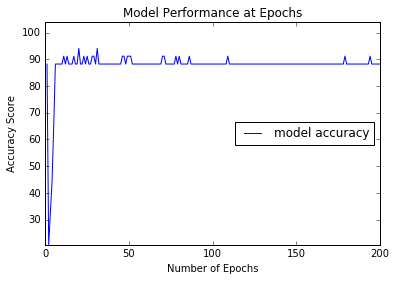

In [10]:
print 'Results of Gradient Descent'
print 'Accuracy scores plotted at each epoch'
linsp = np.linspace(1, numEpochs, numEpochs)
axes = plt.gca()
axes.set_xlim([0, numEpochs])
axes.set_ylim([min(accuracy_SGD), max(accuracy_SGD)+10])
plt.plot(linsp, accuracy_SGD, 'b-', label='model accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('Model Performance at Epochs')
plt.legend(loc='center right')
ix = np.argmax(accuracy_SGD)
print 'epoch with highest accuracy:', ix
print 'score:', round(accuracy_SGD[ix], 3)
for c in range(numCats):
    print 'weights, class', c,  [ round(wi,3) for wi in w_epochs[c][ix] ]

In [11]:
ix = 150
print 'Accuracy score at a selected epoch.' 
print '\nScore at epoch #', ix, ':', 
print round(accuracy_SGD[ix], 3), '\n'
for c in range(numCats):
    print 'weights, class', c, [ round(wi,3) for wi in w_epochs[c][ix] ]

Accuracy score at a selected epoch.

Score at epoch # 150 : 88.235 

weights, class 0 [0.068, 0.642, 1.09, 0.044, -0.934, -0.291, -0.162]
weights, class 1 [0.15, -0.961, -0.385, 0.075, 0.605, 0.641, 0.658]
